In [1]:
import numpy as np
import pandas as pd

In [2]:
label_csv = pd.read_csv('label_hiv.csv')

In [3]:
label_np = np.array(label_csv['x'])
label_np.shape

(59286,)

In [4]:
import matplotlib.pyplot as plt

In [7]:
pacmap_70 = pd.read_csv('./pacmap_norm_redo/norm_70_pacmap_redo.csv')
pacmap_70 = np.array(pacmap_70)

In [10]:
pca_70_ = pd.read_csv('pca_norm_70.csv')
dims = list(pca_70_.columns[1:])
pca_70 = pca_70_[dims]
pca_70 = np.array(pca_70)
pca_low = pca_70[:, 0:2]

In [12]:
umap_70 = pd.read_csv('./DR_norm/norm_70_umap.csv')
umap_70 = np.array(umap_70)

In [13]:
trimap_70 = pd.read_csv('./DR_norm/norm_70_trimap.csv')
trimap_70 = np.array(trimap_70)

In [9]:
dict = {'NK cell': 1, 'DCs': 7, 'T cell': 3, 'B cell': 4, 'CTLs': 5, 'monocyte': 6, 'plasmablast': 2}

(59286,)


<function matplotlib.pyplot.show(close=None, block=None)>

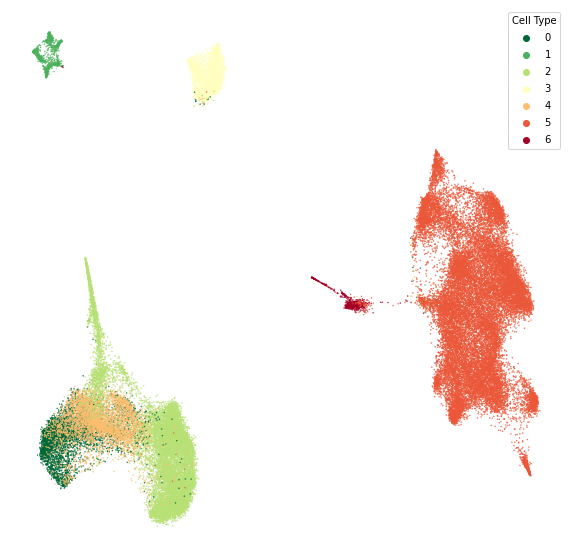

In [10]:
plt.figure(figsize=(10,10))
color = np.zeros(label_np.shape)
print(color.shape)
for i in range(color.shape[0]):
    color[i] = dict[label_np[i]]-1
        
scatter = plt.scatter(pacmap_70[:, 0], pacmap_70[:, 1], c=color, s=0.2, cmap=plt.cm.get_cmap("RdYlGn_r"), label=label_np)

legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cell Type")

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show

In [11]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import scale

def knn_eval(X, y, img_verbose=False, n_splits=5, **kwargs):
    '''
    Ten fold knn accuracy evaluation.
    '''
    X = scale(X)
    skf = StratifiedKFold(n_splits=n_splits)
    sum_acc = 0
    max_acc = n_splits
    for train_index, test_index in skf.split(X, y):
        clf = KNeighborsClassifier(**kwargs)
        clf.fit(X[train_index], y[train_index])
        acc = clf.score(X[test_index], y[test_index])
        sum_acc += acc
    avg_acc = sum_acc/max_acc
    return avg_acc

In [12]:
accu_pacmap = knn_eval(pacmap_70, color, n_neighbors=20)
accu_trimap = knn_eval(trimap_70, color, n_neighbors=20)
accu_umap = knn_eval(umap_70, color, n_neighbors=20)
accu_pca = knn_eval(pca_low, color, n_neighbors=20)

In [14]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

X = pacmap_70

color = np.zeros(label_np.shape)
for i in range(color.shape[0]):
    color[i] = dict[label_np[i]]-1
    
y = color

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x.max()-x.min())/200), np.arange(y_min, y_max, (y.max()-y.min())/200))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) + 0.05
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = KNeighborsClassifier(n_neighbors=20)
clf = model.fit(X, y)

In [16]:
color_dict = ['lightgreen','pink', 'thistle', 'lightgray', 'lightskyblue', 'bisque', 'darkred']

In [17]:
print(color[1:11])
print(color.min(), color.max())
color_dict[4]

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
0.0 6.0


'lightskyblue'

In [18]:
color_ = []
for i in range(color.shape[0]):
    color_.append(color_dict[int(color[i])])

In [19]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

newcmp = ListedColormap(color_dict)
newcmp

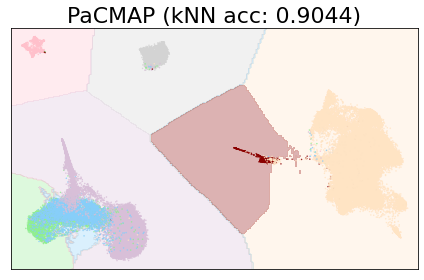

In [26]:
fig, ax = plt.subplots()
# title for the plots
title = ('PaCMAP (kNN acc: %.4f)' % accu_pacmap)
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=newcmp, alpha=0.3)

scatter = ax.scatter(X0, X1, c=color, cmap=newcmp, s=0.2)

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title, fontsize=22)
plt.tight_layout()
plt.savefig('pacmap_KNN')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

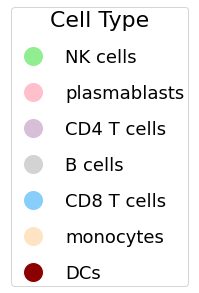

In [35]:
from matplotlib.lines import Line2D
plt.figure(figsize=(3, 4))
cmap=newcmp
markersize=10

custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(0./6), markersize=markersize, label='NK cell'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(1./6), markersize=markersize, label='plasmablast'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(2./6), markersize=markersize, label='CD4 T cell'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(3./6), markersize=markersize, label='B cell'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(4./6), markersize=markersize, label='CD8 T cell'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(5./6), markersize=markersize, label='monocyte'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(6./6), markersize=markersize, label='DCs')]

plt.legend(custom_lines, ['NK cells', 'plasmablasts', 'CD4 T cells', 'B cells', 'CD8 T cells', 'monocytes', 'DCs'], fontsize=18, markerscale=2.0,
                    loc="center", title="Cell Type", title_fontsize=22, labelspacing=1., borderpad=0.2)

plt.axis('off')
plt.tight_layout()
plt.savefig('hiv_knn_legend_name')
plt.show

In [28]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

X = umap_70  # we only take the first two features.

model = KNeighborsClassifier(n_neighbors=20)
clf = model.fit(X, y)

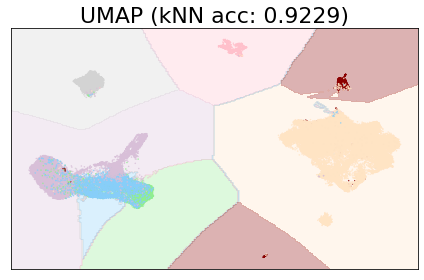

In [30]:
fig, ax = plt.subplots()
# title for the plots
title = ('UMAP (kNN acc: %.4f)' % accu_umap)
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=newcmp, alpha=0.3)

scatter = ax.scatter(X0, X1, c=color, cmap=newcmp, s=0.2)

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title,fontsize=22)
plt.tight_layout()
plt.savefig('umap_KNN')
plt.show()

In [31]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

X = pca_low  # we only take the first two features.

model = KNeighborsClassifier(n_neighbors=20)
clf = model.fit(X, y)

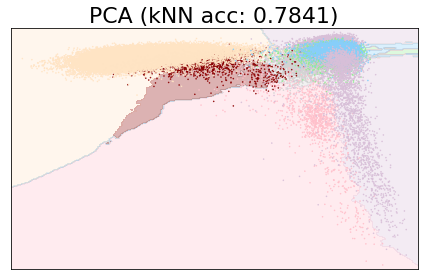

In [34]:
fig, ax = plt.subplots()
# title for the plots
title = ('PCA (kNN acc: %.4f)' % accu_pca)
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=newcmp, alpha=0.3)

scatter = ax.scatter(X0, X1, c=color, cmap=newcmp, s=0.3)

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title,fontsize=22)
plt.tight_layout()
plt.savefig('pca_KNN')
plt.show()

In [104]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X = trimap_70  # we only take the first two features.

model = KNeighborsClassifier(n_neighbors=20)
clf = model.fit(X, y)

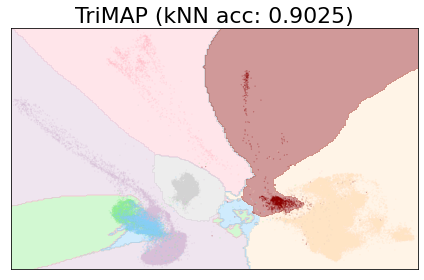

In [105]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x.max()-x.min())/200), np.arange(y_min, y_max, (y.max()-y.min())/200))
    return xx, yy

fig, ax = plt.subplots()
# title for the plots
title = ('TriMAP (kNN acc: %.4f)' % accu_trimap)
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=newcmp, alpha=0.4)

scatter = ax.scatter(X0, X1, c=color, cmap=newcmp, s=0.02)

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title,fontsize=22)
plt.tight_layout()
plt.savefig('trimap_KNN')
plt.show()